In [2]:
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2025-05-09 04:22:18.401207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746778938.683093  196470 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746778938.761800  196470 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746778939.294430  196470 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746778939.294598  196470 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746778939.294602  196470 computation_placer.cc:177] computation placer alr

# Importing the MNIST Dataset
Initially contains 60000 28x28 pixel handwritten images

(60000, 28, 28)


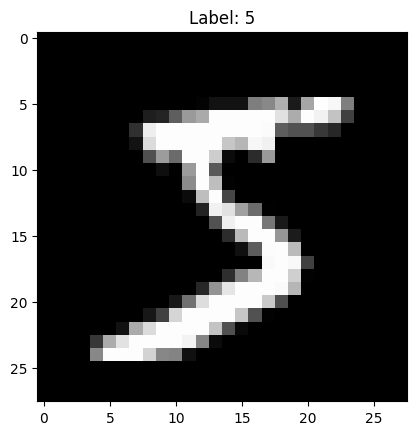

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

# Plot the first image
first_image = x_train[0]
plt.imshow(first_image, cmap='gray')  # 'gray' for grayscale
plt.title(f"Label: {y_train[0]}")  # Display the label (the digit)
plt.show()

# Preprocessing the Data
First requires flattening the data from 28x28 pixel images to 784 dimensional vectors

In [4]:
# Normalize the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape, x_test.shape)


(60000, 784) (10000, 784)


Digit is visible when vector is displayed as 28x28 grid of values (with values>0 highlighted)

In [5]:
# Reshape the 1D array into a 28x28 grid
first_digit_grid = x_train[0].reshape(28, 28)

# Print the 28x28 grid with values >0 in red
for row in first_digit_grid:
    formatted_row = [f"\033[91m{val:5.2f}\033[0m" if val > 0 else f"{val:5.2f}" for val in row]
    print(" ".join(formatted_row))

 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  3.00 18.00 18.00 18.00 126.00 136.00 175.00 26.00 166.00 255.00 247.00 127.00  0.00  0.

### Training on Normalized Data
Provides a baseline for SVC performance

In [6]:
# Randomly sample a subset of the data
subset_size = 10000  # Adjust the size as needed
indices = np.random.choice(x_train.shape[0], subset_size, replace=False)
x_train_subset = x_train[indices]
y_train_subset = y_train[indices]

In [7]:
# Train the SVM on the subset
svm = SVC(kernel='linear', random_state=1, gamma=0.10, C=10.0)
svm.fit(x_train_subset, y_train_subset)
y_pred=svm.predict(x_test)
accuracy_score(y_pred,y_test)

0.9168

### Dimensionality Reduction - UMAP

In [10]:
# Update the variables to use the loaded MNIST data
Un_component = 5
mapper=umap.UMAP(n_neighbors=5,n_components=Un_component,random_state=42).fit(x_train,y=y_train)
umap_component= mapper.transform(x_train)
umap_df = pd.DataFrame(data=umap_component,columns=['component_%i' % i for i in range(Un_component)])
umap_df=umap_df.join(pd.DataFrame(y_train,columns=['label']))

umap_component_test= mapper.transform(x_test)
umap_df_test = pd.DataFrame(data=umap_component_test,columns=['component_%i' % i for i in range(Un_component)])
umap_df_test=umap_df_test.join(pd.DataFrame(y_test,columns=['label']))

/home/quantum/github/ECCS_3401/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/quantum/github/ECCS_3401/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


### Dimensionality Reduction - PCA

In [26]:
# Run The PCA
PCA_components=3
pca = PCA(n_components=PCA_components)
pca.fit(x_train)
 
# Store results of PCA in a data frame
pca_df=pd.DataFrame(pca.transform(x_train), columns=['component_%i' % i for i in range(PCA_components)])
pca_df=pca_df.join(pd.DataFrame(y_train,columns=['label']))

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


## 2D & 3D PCA Plots

/tmp/ipykernel_178999/1769697350.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs[0:300], ys[0:300], zs[0:300], c=colors[0:300], cmap=cmap)


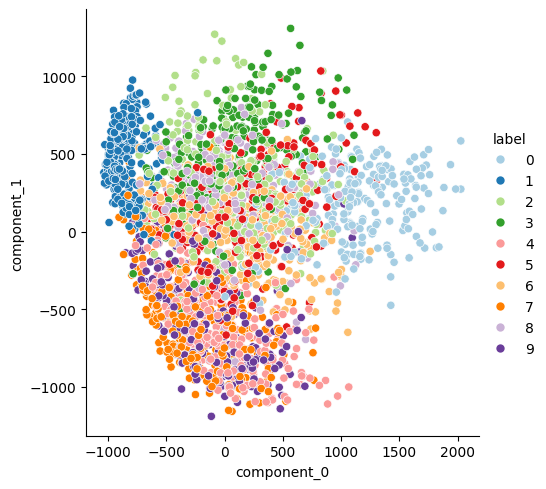

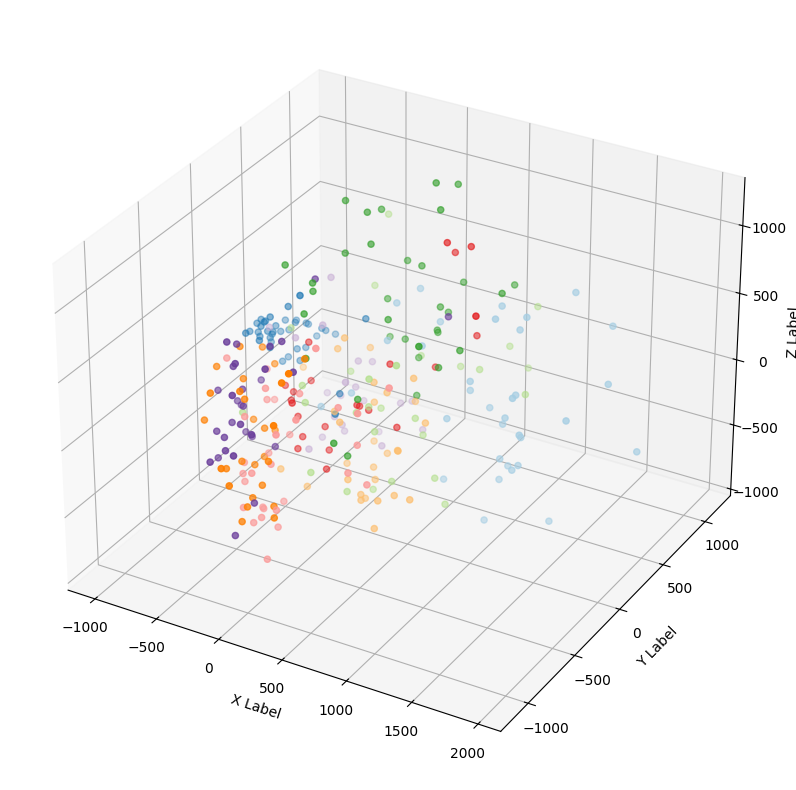

In [35]:
sns.relplot(x="component_0", y="component_1", hue="label", data=pca_df[300:3000], palette="Paired")
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Define the color palette and map colors to labels
palette = sns.color_palette("Paired", len(pca_df['label'].unique()))
label_to_color = {label: palette[i] for i, label in enumerate(sorted(pca_df['label'].unique()))}
colors = pca_df['label'].map(label_to_color)

# For each set of style and range settings, plot n random points in the box
xs = pca_df['component_0']
ys = pca_df['component_1']
zs = pca_df['component_2']
ax.scatter(xs[0:300], ys[0:300], zs[0:300], c=colors[0:300], cmap=cmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## 2D & 3D UMAP Plots

/tmp/ipykernel_178999/1987765968.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs[0:300], ys[0:300], zs[0:300], c=colors[0:300], cmap=cmap)


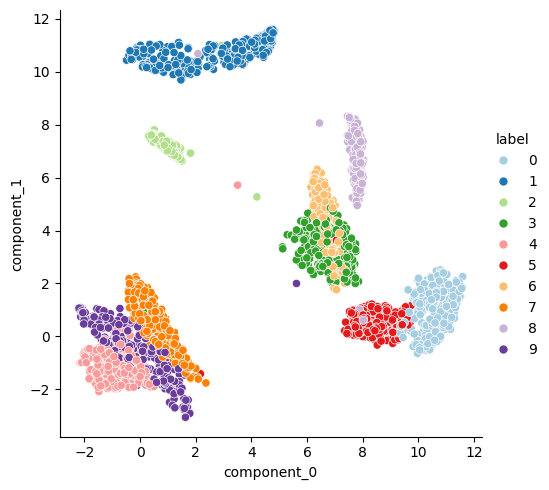

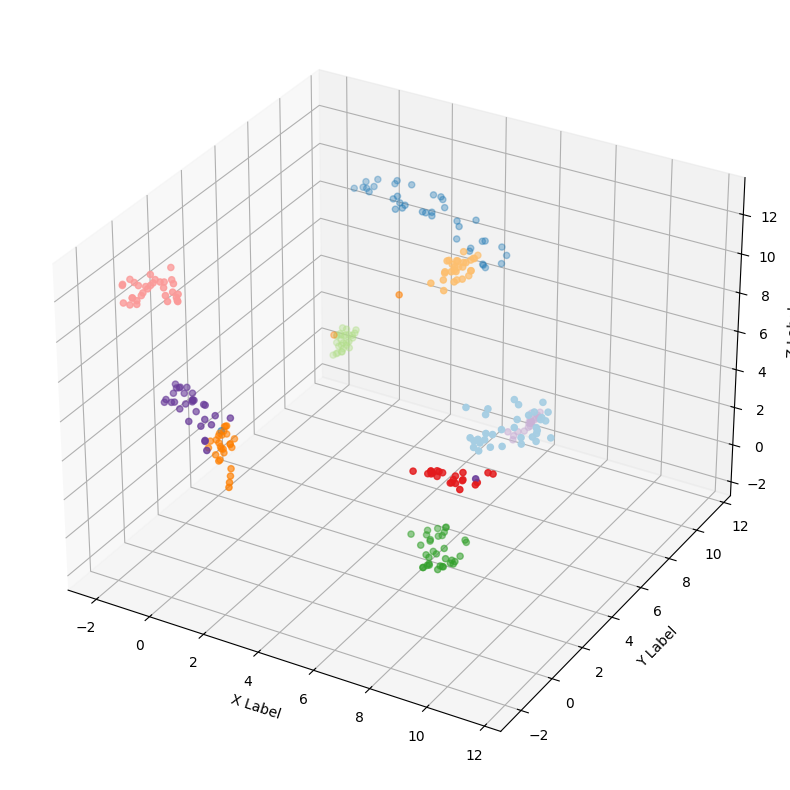

In [37]:
sns.relplot(x="component_0", y="component_1", hue="label", data=umap_df[300:3000], palette="Paired")
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Define the color palette and map colors to labels
palette = sns.color_palette("Paired", len(umap_df['label'].unique()))
label_to_color = {label: palette[i] for i, label in enumerate(sorted(umap_df['label'].unique()))}
colors = umap_df['label'].map(label_to_color)

# For each set of style and range settings, plot n random points in the box
xs = umap_df['component_0']
ys = umap_df['component_1']
zs = umap_df['component_2']
ax.scatter(xs[0:300], ys[0:300], zs[0:300], c=colors[0:300], cmap=cmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Model Training

In [11]:
X,y=umap_component,umap_df['label']
X_test_umap, y_test_umap=umap_component_test,umap_df_test['label']


In [12]:
# Randomly sample a subset of the UMAP-transformed data
subset_size_umap = 10000  # Adjust the size as needed
indices_umap = np.random.choice(umap_component.shape[0], subset_size_umap, replace=False)
umap_component_subset = umap_component[indices_umap]
umap_label_subset = umap_df['label'].iloc[indices_umap]

In [13]:
svm = SVC(kernel='linear', random_state=1, gamma=0.10, C=10.0)
svm.fit(umap_component_subset, umap_label_subset)
y_pred = svm.predict(X_test_umap)
accuracy_score(y_pred, y_test)

0.9029

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline with UMAP and SVM
pipeline = Pipeline([
    ('umap', umap.UMAP(n_jobs=1)),
    ('svm', SVC(kernel='linear', random_state=1))
])

# Define the parameter grid for n_neighbors
param_grid = {
    'umap__n_neighbors': [5, 10, 15, 20, 25],
    'umap__n_components': [5],  # Keep n_components fixed for now
    'svm__C': [10]  # Optionally tune SVM hyperparameters
}

# Perform GridSearchCV using the subset of training data
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', return_train_score=True ,verbose=4, n_jobs=1)
grid_search.fit(umap_component_subset, umap_label_subset)

# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_umap)
test_accuracy = accuracy_score(y_test_umap, y_pred)
print("Test set accuracy:", test_accuracy)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
